In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score

In [2]:
train_origin = pd.read_csv("./data/creditcard_train.csv")
test_origin  = pd.read_csv("./data/creditcard_test.csv")
train_origin.shape
#train_origin.iloc[:, [2, 31]]

(227789, 32)

# Visualize data

ValueError: num must be 1 <= num <= 32, not 33

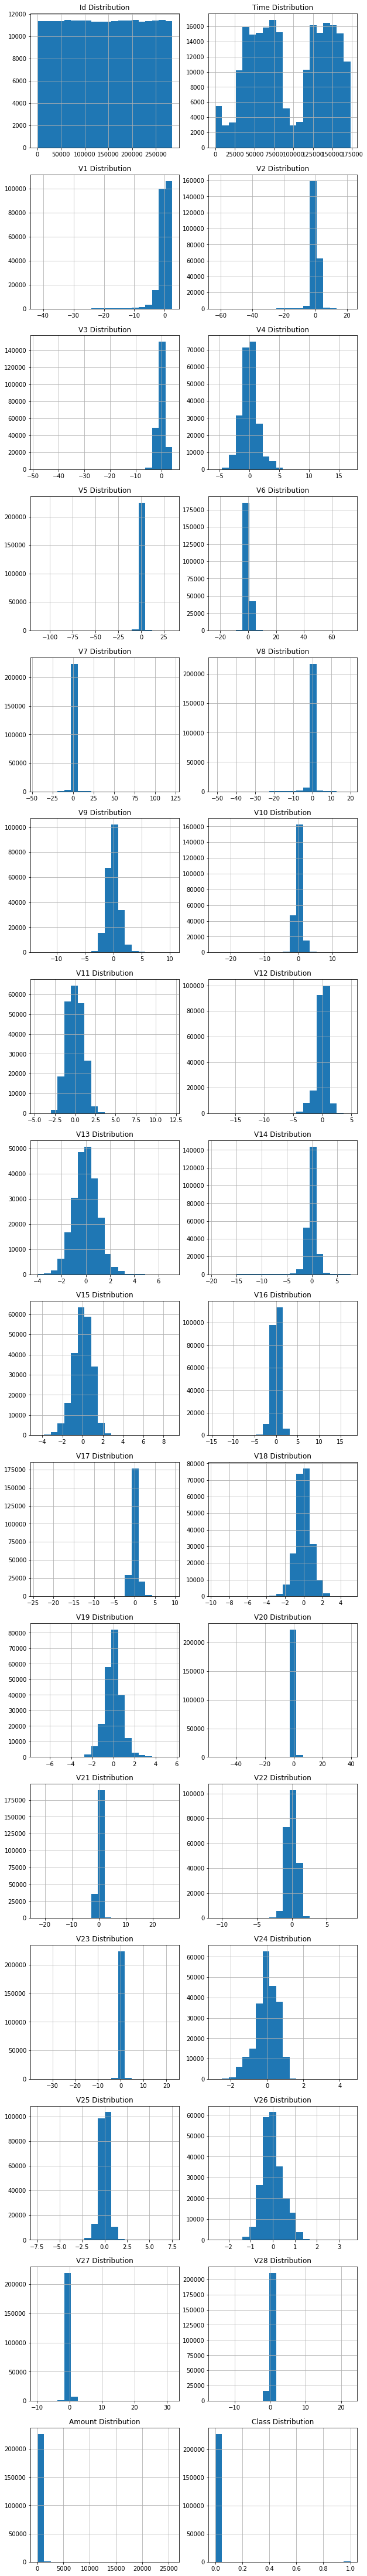

In [71]:
length = train_origin.shape[1]

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(10,80))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
draw_histograms(train_origin, train_origin.columns, length/2, 2)


Text(0.5,1,' Distribution of log amount ')

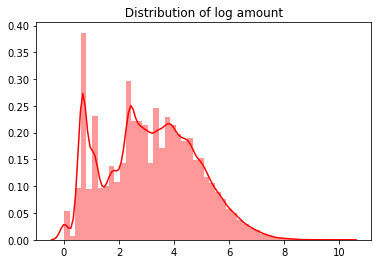

In [128]:
import seaborn as sns
amount_val = train_origin["log_amount"].values
ax = sns.distplot(amount_val, color = "r")
ax.set_title(" Distribution of log amount ", fontsize = 12)

# handle long tail distribution data

In [72]:
train_origin["log_amount"]=np.log(train_origin["Amount"] + 1)
test_origin["log_amount"]=np.log(test_origin["Amount"] + 1)

In [73]:
train_origin.head()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,log_amount
0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760
1,1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626
2,2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276
3,3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306
4,4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539


In [74]:
test_origin.head()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,log_amount
0,11,10,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,2.396986
1,17,13,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,...,-0.194796,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0.89,0.636577
2,18,14,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,3.867026
3,20,16,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,5.449793
4,27,23,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,...,-0.284376,-0.323357,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,16.00,2.833213


# Feture Selection
# Using Cross validation with Naive Bayes to find the most unrelated columns

In [75]:
y = train_origin["Class"]
X = train_origin.drop("Class", axis = 1)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [76]:
X.head()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,log_amount
0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,5.014760
1,1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1.305626
2,2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,5.939276
3,3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,4.824306
4,4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,4.262539


In [77]:
from sklearn.naive_bayes import BernoulliNB
def NB_classify(drop_var, X, y):
    clf = BernoulliNB()
    scores = cross_val_score(clf, X.drop(drop_var, axis = 1), 
                             y, cv = 4, scoring = "f1")
    #print(np.mean(scores))
    return np.mean(scores)

In [78]:
scores = dict()
for col in X.columns:
    #print(col)
    score = NB_classify(col, X, y)
    scores[col] = score

In [79]:
print(*sorted(scores.items(), key = lambda x:x[1]), sep = "\n")

('V3', 0.6462771691879674)
('V12', 0.6470441229167774)
('V4', 0.668716086910364)
('V14', 0.6698108724932113)
('V11', 0.6716392612786786)
('V7', 0.6811921549096108)
('V16', 0.6822629122419109)
('V10', 0.6874148706466812)
('V2', 0.6988210340207162)
('V17', 0.6995734094950496)
('V6', 0.7002768188470448)
('V9', 0.7013155282831485)
('V20', 0.705928274501515)
('V8', 0.706132138628302)
('V28', 0.7077581318025828)
('Id', 0.708359817617108)
('Time', 0.708359817617108)
('V23', 0.708359817617108)
('V26', 0.7086373348774895)
('V21', 0.7100655700932534)
('V24', 0.7102249876668458)
('Amount', 0.7107739079818045)
('log_amount', 0.7107739079818045)
('V27', 0.7111399711399711)
('V22', 0.7126608928859253)
('V19', 0.7163248282717598)
('V25', 0.7166732521500547)
('V13', 0.7179701540293645)
('V1', 0.7198885282259044)
('V15', 0.7203636049429265)
('V18', 0.7237424909200303)
('V5', 0.7299824971507873)


# Use sklearn class method selectKBest to do feature filtering

In [80]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k = 29).fit(X, y)
features = selector.transform(X)

mask = selector.get_support()
newFeatures = []
abandanedFeatures = []
for bool, feature in zip(mask, X.columns):
    if  bool:  
        newFeatures.append(feature)
    else:
        abandanedFeatures.append(feature)

X_new = pd.DataFrame(features, columns = newFeatures )
abandanedFeatures

['V22', 'V23', 'V25']

# Drop columns most unrelated

In [81]:
abandonedColumns = ["V15", "V18", "V5"]
selectedX = X.drop(abandonedColumns, axis = 1)
selectedXtest = test_origin.drop(abandonedColumns, axis = 1)
selectedX.head()

,Id,Time,V1,V2,V3,V4,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,log_amount
0,0,0,-1.359807,-0.072781,2.536347,1.378155,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,5.014760
1,1,0,1.191857,0.266151,0.166480,0.448154,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1.305626
2,2,1,-1.358354,-1.340163,1.773209,0.379780,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,5.939276
3,3,1,-0.966272,-0.185226,1.792993,-0.863291,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,4.824306
4,4,2,-1.158233,0.877737,1.548718,0.403034,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,4.262539


# Training with Naive Bayes model

In [82]:
model_nb = BernoulliNB()
model_nb.fit(selectedX, y)

pred_nb = model_nb.predict(selectedXtest)

In [83]:
submission_nb = pd.DataFrame({"Id": test_origin.Id, "Class": pred_nb})
submission_nb.to_csv("./revisit_output/submission_nb_revisit_Jie_Ling.csv", columns=["Id", "Class"], header = True, index = False)
#0.729

# Under sampling for unbalanced data

In [84]:
def undersample(ratio, X, y):
    goodones = X[y == 0].index
    badones  = X[y == 1].index
    
    numBadOnes = len(badones)   
    goodonesSampled = np.random.choice(goodones, numBadOnes*ratio, replace = False)
    combined = np.concatenate([goodonesSampled, badones])
    
    return X.iloc[combined], y.iloc[combined]

In [85]:
XSampled, ySampled = undersample(250, selectedX, y)

In [140]:
XSampled_originalfeatures, ySampled_originalfeatures = undersample(250, X, y)

# Redo the training with Naive Bayes

In [86]:
model_nb = BernoulliNB()
model_nb.fit(XSampled, ySampled)

pred_nb = model_nb.predict(selectedXtest)

In [87]:
submission_nb = pd.DataFrame({"Id": test_origin.Id, "Class": pred_nb})
submission_nb.to_csv("./revisit_output/submission_nb_revisit_undersampled.csv", columns=["Id", "Class"], header = True, index = False)
#0.70466 no better than before undersampling

# Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
modelLR = LogisticRegression()
modelLR.fit(XSampled, ySampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
predLR = modelLR.predict(selectedXtest)

In [91]:
submissionLR = pd.DataFrame({"Id": selectedXtest.Id, "Class": predLR})
submissionLR.to_csv("./revisit_output/submission_LR_revisit_undersampled.csv", columns=["Id", "Class"], header = True, index = False)
#0.70466

# pprint for pretty print of model parameters

In [92]:
from pprint import pprint   # for pretty print

In [93]:
pprint(modelLR.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


# GridSearchCV
# Using CV to choose hyper parameters

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {
    "penalty": ["l1", "l2"],
    "class_weight": ["balanced", None],
    "C": [0.1, 1, 10]
}

modelLRCV = GridSearchCV(estimator = modelLR, 
                       param_grid=param_grid, 
                       scoring = "f1", 
                       verbose=1,
                       n_jobs=-1)
modelLRCV.fit(XSampled, ySampled)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


Process ForkPoolWorker-72:
Process ForkPoolWorker-68:
Process ForkPoolWorker-66:
Process ForkPoolWorker-70:
Process ForkPoolWorker-65:
Process ForkPoolWorker-69:
Process ForkPoolWorker-67:
Process ForkPoolWorker-71:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/m

KeyboardInterrupt: 

In [ ]:
best_parameters = modelLRCV.best_params_
print(best_parameters)
# train result from colab
# {'C': 1, 'class_weight': None, 'penalty': 'l1'}

In [97]:
best_parameters = {'C': 1, 'class_weight': None, 'penalty': 'l1'}

# use the best paramets just got by gridsearch to train new lr models

In [98]:
modelLRBest = LogisticRegression(C = best_parameters["C"],
                                 penalty = best_parameters["penalty"],
                                 class_weight = best_parameters["class_weight"])

In [101]:
# here should use unsampled data??
modelLRBest.fit(selectedX, y)
pred_LR_best = modelLRBest.predict(selectedXtest)

In [121]:
submissionLRCV = pd.DataFrame({"Id": selectedXtest.Id, "Class": pred_LR_best})
submissionLRCV.to_csv("./revisit_output/submission_LR_revisit_gridSearchCV.csv", columns=["Id", "Class"], header = True, index = False)
#0.72093

# Ensemble Voting

In [104]:
from sklearn.ensemble import VotingClassifier

In [105]:
model_voting = VotingClassifier(
                                estimators=[("nb",model_nb), ('lr', modelLRBest)], 
                                voting = "soft", 
                                weights = [1, 1.5]
                                )

In [106]:
model_voting.fit(XSampled, ySampled)

VotingClassifier(estimators=[('nb', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)), ('lr', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=[1, 1.5])

In [107]:
pred_voting = model_voting.predict(selectedXtest)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [124]:
submissionLRVoting = pd.DataFrame({"Id": selectedXtest.Id, "Class": pred_voting})
submissionLRVoting.to_csv("./revisit_output/submission_EnsembleVoting_revisit.csv", columns=["Id", "Class"], header = True, index = False)
#0.79144

# Ransom Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
model_RF = RandomForestClassifier(n_jobs=-1)

In [130]:
model_RF.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [131]:
pred_RF = model_RF.predict(test_origin)

In [132]:
submissionRF = pd.DataFrame({"Id": selectedXtest.Id, "Class": pred_RF})
submissionRF.to_csv("./revisit_output/submission_RandomForest_revisit.csv", columns=["Id", "Class"], header = True, index = False)
#0.86188

0.82759

In [134]:
selectedX.shape, selectedXtest.shape

((227789, 29), (57018, 29))

In [136]:
# fit the selected train data
model_RF_selected = RandomForestClassifier(n_jobs=-1)
model_RF_selected.fit(selectedX, y)
pred_RF_selected = model_RF_selected.predict(selectedXtest)
submissionRF_selected = pd.DataFrame({"Id": selectedXtest.Id, "Class": pred_RF_selected})
submissionRF_selected.to_csv("./revisit_output/submission_RandomForest_selected_revisit.csv", columns=["Id", "Class"], header = True, index = False)
#0.81609 lower than unselected

In [138]:
# fit the selected train data also undersampled
model_RF_selected_undersampled = RandomForestClassifier(n_jobs=-1)
model_RF_selected_undersampled.fit(XSampled, ySampled)
pred_RF_selected_undersampled = model_RF_selected_undersampled.predict(selectedXtest)
submissionRF_selected_undersampled = pd.DataFrame({"Id": selectedXtest.Id, "Class": pred_RF_selected_undersampled})
submissionRF_selected_undersampled.to_csv("./revisit_output/submission_RandomForest_selected_undersampled_revisit.csv", columns=["Id", "Class"], header = True, index = False)
#0.85263

In [142]:
# fit the undersampled data with original features
model_RF_undersampled = RandomForestClassifier(n_jobs=-1)
model_RF_undersampled.fit(XSampled_originalfeatures, ySampled_originalfeatures)
pred_RF_undersampled = model_RF_undersampled.predict(test_origin)
submissionRF_undersampled = pd.DataFrame({"Id": test_origin.Id, "Class": pred_RF_undersampled})
submissionRF_undersampled.to_csv("./revisit_output/submission_RandomForest_undersampled_revisit.csv", columns=["Id", "Class"], header = True, index = False)
#0.81720

In [139]:
# undersampled > original > seleceted feature with random forest

In [ ]:
XSampled_originalfeatures